# Stock Price Prediction 

## Data collection

The data was collected from Kaggle, a reputable source for data. It was used for a Hackathon to predict stock prices for the Tokyo Stock Exchange. It can be [accessed here](https://www.kaggle.com/datasets/daiearth22/uniqlo-fastretailing-stock-price-prediction).

The data has 7 features which include: 

* Date 
* Open
* High
* Low
* Close
* Volume
* Stock trading

## Data cleaning/Pre-processing

### Loading the Data

In [1]:
import numpy as np
import pandas as pd 

df = pd.read_csv(r'..\data\Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [2]:
df.shape

(1226, 7)

The data has 1226 records and 7 features

### Checking for missing data and duplicates

In [3]:
df.duplicated().sum()

0

In [4]:
df.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
Stock Trading    0
dtype: int64

No nulls or duplicate in the dataset

In [5]:
#checking the data type of each column in the dataset
df.dtypes

Date             object
Open              int64
High              int64
Low               int64
Close             int64
Volume            int64
Stock Trading     int64
dtype: object

### Datetime conversion

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

#setting Date as the index
df.set_index('Date', inplace=True)

df.head()

,Open,High,Low,Close,Volume,Stock Trading
Date,,,,,,
2016-12-30,42120,42330,41700,41830,610000,25628028000
2016-12-29,43000,43220,42540,42660,448400,19188227000
2016-12-28,43940,43970,43270,43270,339900,14780670000
2016-12-27,43140,43700,43140,43620,400100,17427993000
2016-12-26,43310,43660,43090,43340,358200,15547803000


### Sorting the data

In [7]:
df.sort_index(inplace=True)
df.head()

,Open,High,Low,Close,Volume,Stock Trading
Date,,,,,,
2012-01-04,14050,14050,13700,13720,559100,7719804000
2012-01-05,13720,13840,13600,13800,511500,7030811000
2012-01-06,13990,14030,13790,13850,765500,10635609000
2012-01-10,13890,14390,13860,14390,952300,13533413000
2012-01-11,14360,14750,14280,14590,1043400,15191988000


### Feature Engineering 

In [8]:
df['Day'] = df.index.day
df['Month'] = df.index.month
df['Year'] = df.index.year


In [9]:
df.head()

,Open,High,Low,Close,Volume,Stock Trading,Day,Month,Year
Date,,,,,,,,,
2012-01-04,14050,14050,13700,13720,559100,7719804000,4,1,2012
2012-01-05,13720,13840,13600,13800,511500,7030811000,5,1,2012
2012-01-06,13990,14030,13790,13850,765500,10635609000,6,1,2012
2012-01-10,13890,14390,13860,14390,952300,13533413000,10,1,2012
2012-01-11,14360,14750,14280,14590,1043400,15191988000,11,1,2012


## Data Visualization

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

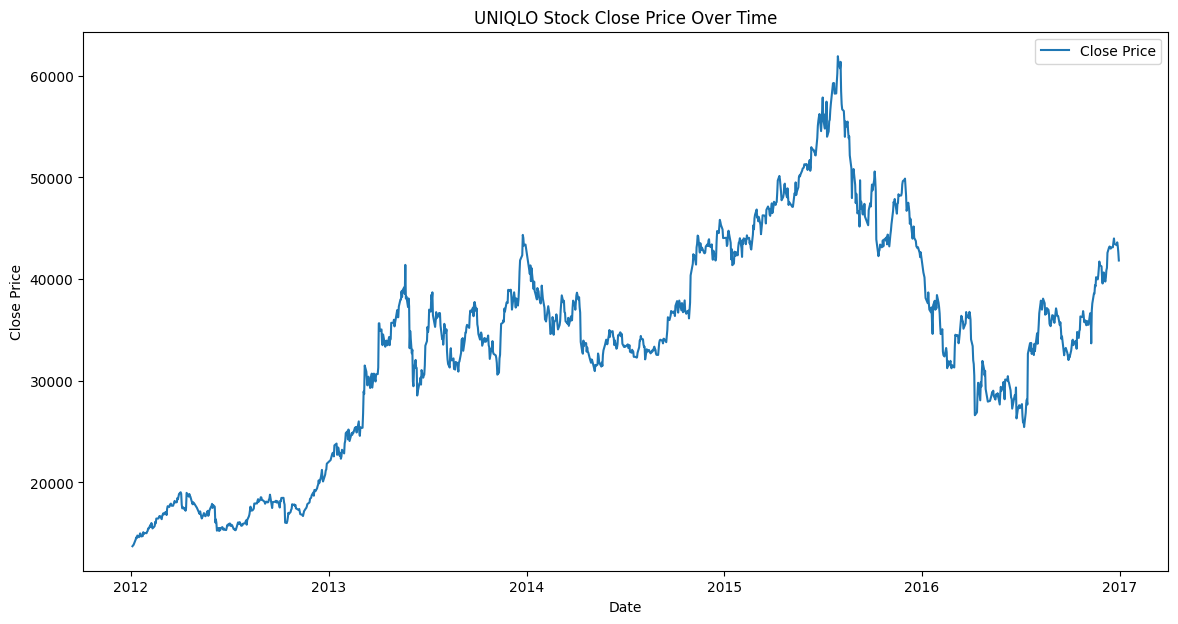

In [11]:
#Visualization 1: Time Series Plot of Stock Prices

plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.title('UNIQLO Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [12]:
df_viz = df.copy()

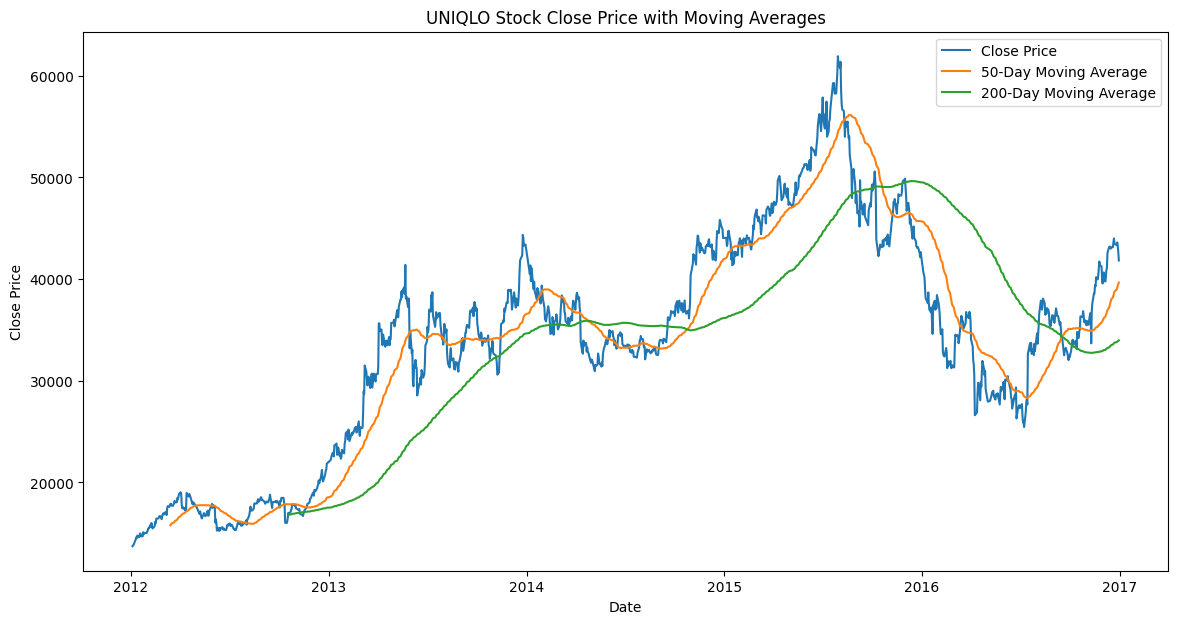

In [13]:
#Visualization 2: Moving Averages

df_viz['MA50'] = df_viz['Close'].rolling(window=50).mean()
df_viz['MA200'] = df_viz['Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
plt.plot(df_viz['Close'], label='Close Price')
plt.plot(df_viz['MA50'], label='50-Day Moving Average')
plt.plot(df_viz['MA200'], label='200-Day Moving Average')
plt.title('UNIQLO Stock Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


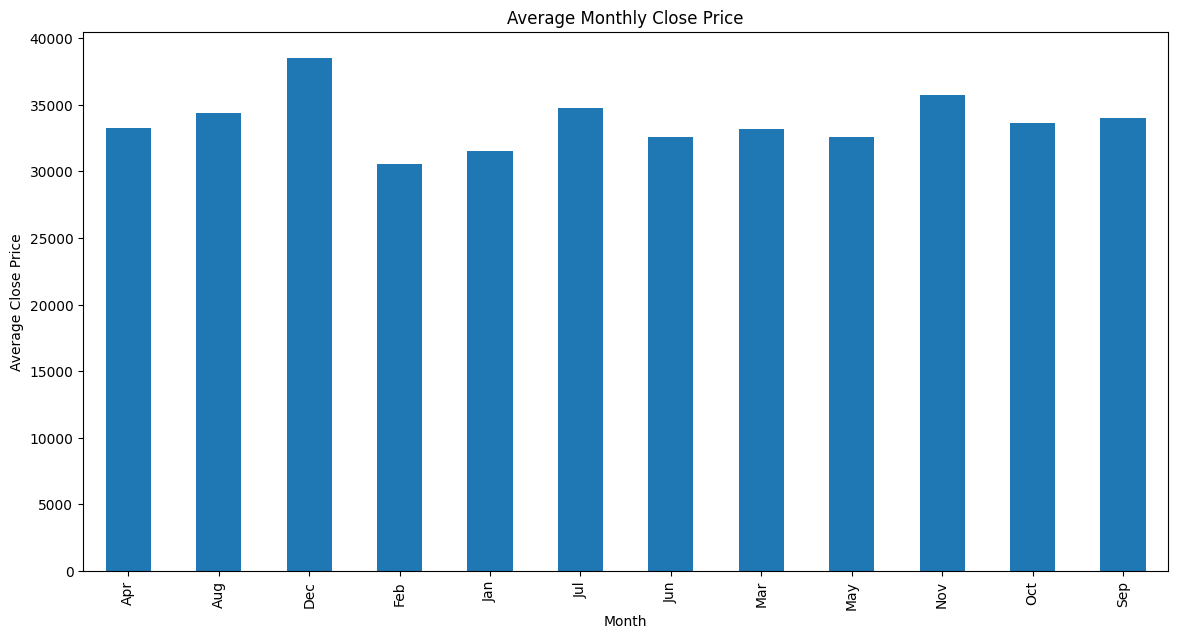

In [14]:
#Visualization 3: Monthly and Yearly Trends

#monthly
df_viz['Month_name'] = df_viz.index.strftime("%b")
monthly_avg = df_viz.groupby('Month_name')['Close'].mean()

plt.figure(figsize=(14, 7))
monthly_avg.plot(kind='bar')
plt.title('Average Monthly Close Price')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.show()

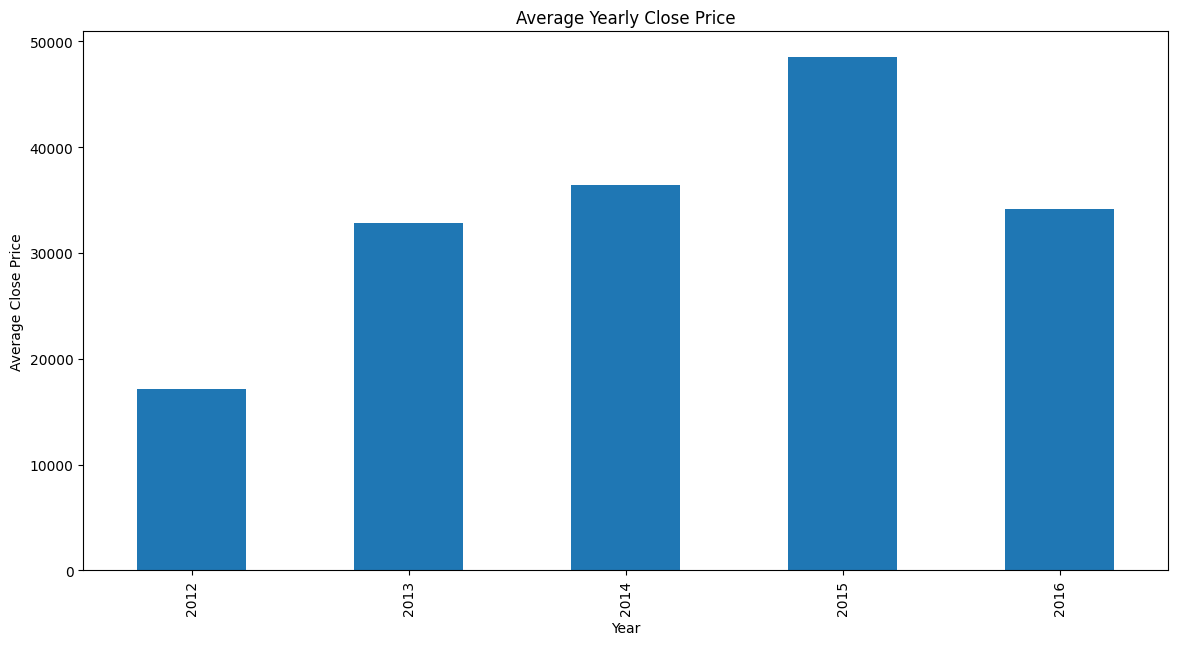

In [15]:
#yearly

df_viz['Year'] = df_viz.index.year
yearly_avg = df_viz.groupby('Year')['Close'].mean()

plt.figure(figsize=(14, 7))
yearly_avg.plot(kind='bar')
plt.title('Average Yearly Close Price')
plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.show()

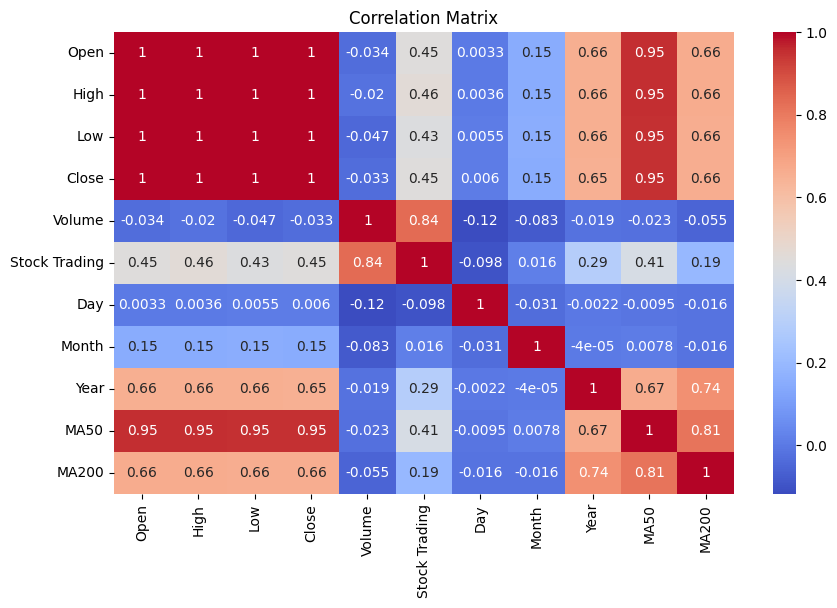

In [16]:
# Visualization 4: Heatmap of Correlations

plt.figure(figsize=(10, 6))
correlation_matrix = df_viz.drop(columns=['Month_name']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


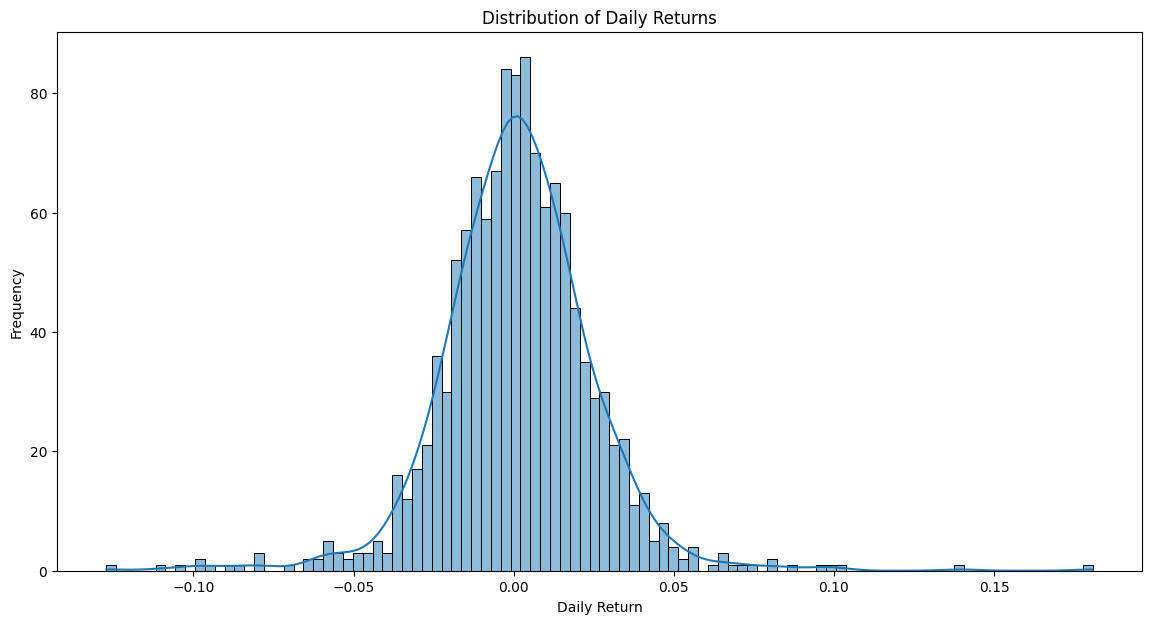

In [17]:
#Visualization 5: Daily Returns Distribution

df_viz['Daily Return'] = df_viz['Close'].pct_change()

plt.figure(figsize=(14, 7))
sns.histplot(df_viz['Daily Return'].dropna(), bins=100, kde=True)
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

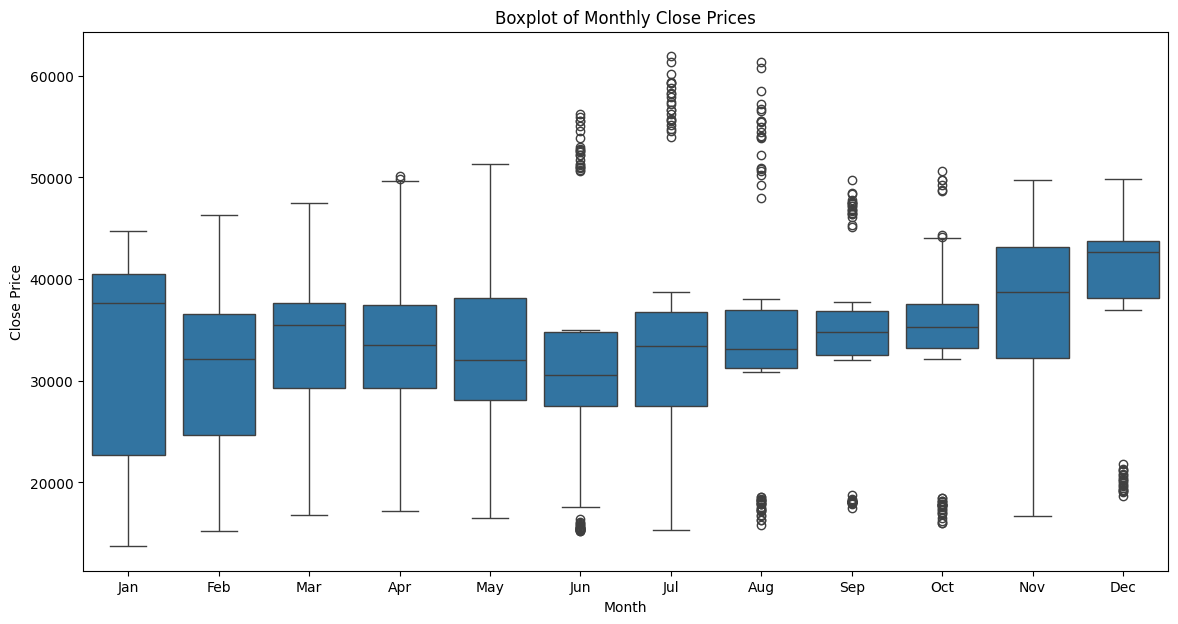

In [18]:
#Visualization 6: Boxplot of Monthly Close Prices

plt.figure(figsize=(14, 7))
sns.boxplot(x='Month_name', y='Close', data=df_viz)
plt.title('Boxplot of Monthly Close Prices')
plt.xlabel('Month')
plt.ylabel('Close Price')
plt.show()

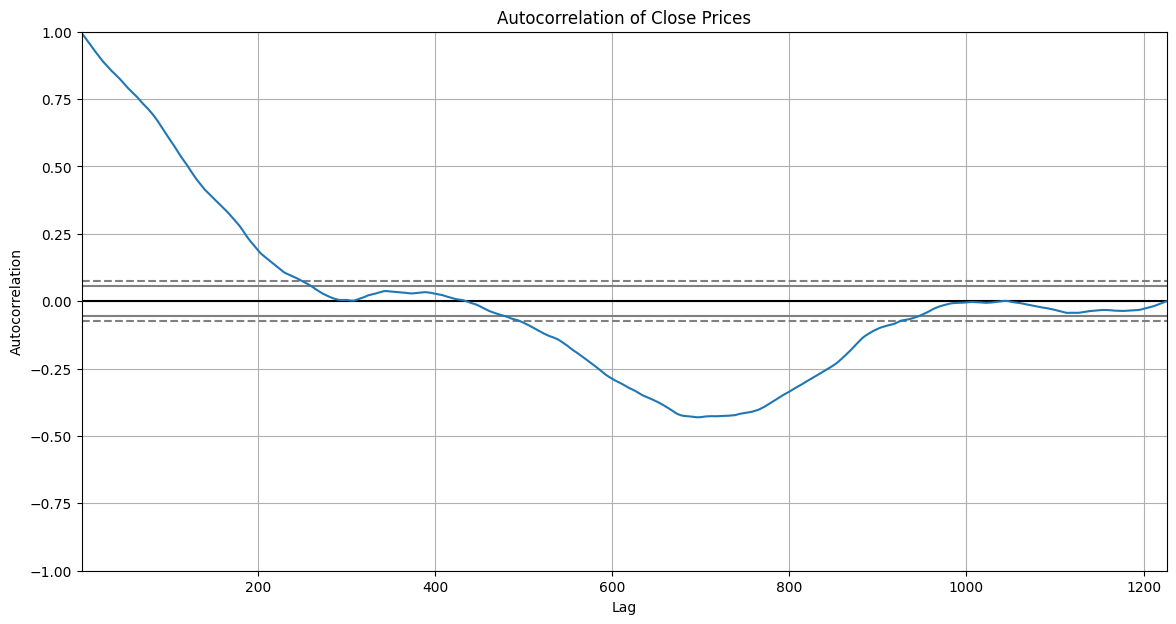

In [19]:
# Visualization 7: Autocorrelation Plot
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(14, 7))
autocorrelation_plot(df_viz['Close'])
plt.title('Autocorrelation of Close Prices')
plt.show()

## Exporting pre processed data

In [20]:
df.to_csv('../data/pre-processed-data.csv')